# Crop Yield Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle

# Dataset

In [2]:
data=pd.read_csv('C:/Users/Windows PC/crop_yield_prediction/complete_dataset.csv')
data

,state_names,district_names,crop_year,season_names,crop_names,area,temperature,wind_speed,precipitation,humidity,soil_type,N,P,K,production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,20.48349,1.971802,1013.011877,64.876363,clay,598.552,0.000,0.000,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,20.48349,1.971802,1013.011877,64.876363,sandy,7.182,18.354,0.000,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,20.48349,1.971802,1013.011877,64.876363,clay,35.742,0.000,0.000,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,20.48349,1.971802,1013.011877,64.876363,peaty,8.740,8.740,0.000,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,20.48349,1.971802,1013.011877,64.876363,clay,0.615,0.615,0.615,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,20.48349,1.971802,1013.011877,64.876363,sandy,9.630,24.610,0.000,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,20.48349,1.971802,1013.011877,64.876363,loamy,56.070,0.000,0.000,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,20.48349,1.971802,1013.011877,64.876363,peaty,9.000,9.000,0.000,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,20.48349,1.971802,1013.011877,64.876363,silt,0.000,0.000,0.000,597899.0


In [3]:
data=data[data['crop_year']>=2004]

In [4]:
data=data.drop(['soil_type','season_names','crop_year'],axis=1)

In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152167 entries, 36 to 246090
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state_names     152167 non-null  object 
 1   district_names  152167 non-null  object 
 2   crop_names      152167 non-null  object 
 3   area            152167 non-null  float64
 4   temperature     152167 non-null  float64
 5   wind_speed      152167 non-null  float64
 6   precipitation   152167 non-null  float64
 7   humidity        152167 non-null  float64
 8   N               152167 non-null  float64
 9   P               152167 non-null  float64
 10  K               152167 non-null  float64
 11  production      152167 non-null  float64
dtypes: float64(9), object(3)
memory usage: 15.1+ MB


In [6]:
data['crop_names'].unique()

array(['Rice', 'Arecanut', 'Banana', 'Black pepper', 'Cashewnut',
       'Coconut ', 'Dry chillies', 'Dry ginger', 'other oilseeds',
       'Turmeric', 'Sugarcane', 'Sweet potato', 'Tapioca', 'Maize',
       'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut', 'Sunflower',
       'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram', 'Jowar',
       'Onion', 'Other Kharif pulses', 'Ragi', 'Small millets',
       'Soyabean', 'Gram', 'Linseed', 'Safflower', 'Wheat', 'Coriander',
       'Potato', 'Tobacco', 'Rapeseed &Mustard', 'Mesta', 'Cowpea(Lobia)',
       'Brinjal', 'Grapes', 'Lemon', 'Mango', 'Papaya', 'Pome Granet',
       'Sapota', 'Tomato', 'Cabbage', 'Other  Rabi pulses', 'Sesamum',
       'Niger seed', 'Sannhamp', 'Garlic', 'Ginger', 'Oilseeds total',
       'Jute', 'Masoor', 'Peas & beans (Pulses)', 'Blackgram', 'Paddy',
       'Orange', 'Pineapple', 'Barley', 'Khesari', 'Guar seed',
       'Other Fresh Fruits', 'Other Vegetables', 'Moth',
       'Other Cereals & Millets', 'C

In [7]:
crops=['Rice','Banana','Maize','Cotton(lint)','Onion','Potato','Tomato','Carrot','Drum Stick','Ragi']
data=data[data['crop_names'].isin(crops)]
data['crop_names'].unique()

array(['Rice', 'Banana', 'Maize', 'Cotton(lint)', 'Onion', 'Ragi',
       'Potato', 'Tomato', 'Drum Stick'], dtype=object)

In [8]:
data.shape

(35151, 12)

In [9]:
data.isnull().sum()

state_names       0
district_names    0
crop_names        0
area              0
temperature       0
wind_speed        0
precipitation     0
humidity          0
N                 0
P                 0
K                 0
production        0
dtype: int64

In [10]:
data.describe()

,area,temperature,wind_speed,precipitation,humidity,N,P,K,production
count,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,35151.000000,3.515100e+04
mean,19480.843206,20.486013,1.972771,1013.015411,65.069466,62.604321,13.358653,6.294365,5.456701e+04
std,48110.908811,1.051563,0.186358,0.647840,4.320689,205.230145,24.108704,14.304044,1.466472e+05
min,0.100000,2.430000,0.270000,1009.000000,37.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,141.000000,20.483490,1.971802,1013.011877,64.876363,0.615000,0.000000,0.000000,4.895000e+02
50%,1282.000000,20.483490,1.971802,1013.011877,64.876363,4.068000,3.760000,0.000000,4.735000e+03
75%,11341.000000,20.483490,1.971802,1013.011877,64.876363,10.580000,15.870000,1.501000,3.478850e+04
max,687000.000000,25.940000,3.490000,1023.000000,96.000000,928.372000,111.200000,55.600000,3.530571e+06


In [11]:
data=data[data['production']>0]

<AxesSubplot:xlabel='temperature', ylabel='production'>

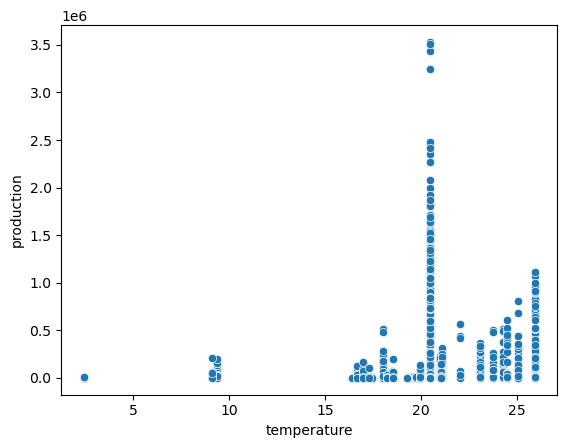

In [12]:
sns.scatterplot(x=data['temperature'],y=data['production'])

In [13]:
data=data[data['temperature']>10]

<AxesSubplot:>

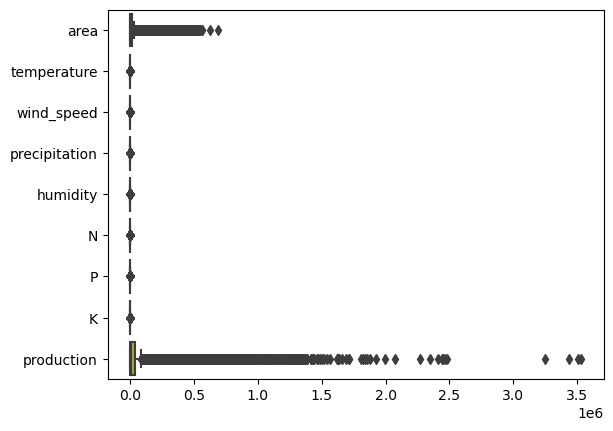

In [14]:
sns.boxplot(data=data,orient='h')

In [15]:
Q3 = np.percentile(data['production'], 75,
                   interpolation = 'midpoint')

data=data[data['production']<=(Q3)]
data.shape

(25975, 12)

In [16]:
data.corr()

,area,temperature,wind_speed,precipitation,humidity,N,P,K,production
area,1.000000,-0.012285,0.000667,0.013544,-0.020885,-0.004883,-0.000801,-0.002032,0.370986
temperature,-0.012285,1.000000,0.519684,-0.683190,0.620532,-0.004283,0.003007,0.002409,0.033008
wind_speed,0.000667,0.519684,1.000000,-0.068593,0.060101,0.004536,0.003933,0.005946,0.016640
precipitation,0.013544,-0.683190,-0.068593,1.000000,-0.788429,0.003224,-0.005599,-0.004428,-0.030499
humidity,-0.020885,0.620532,0.060101,-0.788429,1.000000,-0.001099,0.005445,0.001594,0.010668
N,-0.004883,-0.004283,0.004536,0.003224,-0.001099,1.000000,-0.099635,-0.065687,-0.001655
P,-0.000801,0.003007,0.003933,-0.005599,0.005445,-0.099635,1.000000,0.869272,0.000939
K,-0.002032,0.002409,0.005946,-0.004428,0.001594,-0.065687,0.869272,1.000000,0.001821
production,0.370986,0.033008,0.016640,-0.030499,0.010668,-0.001655,0.000939,0.001821,1.000000


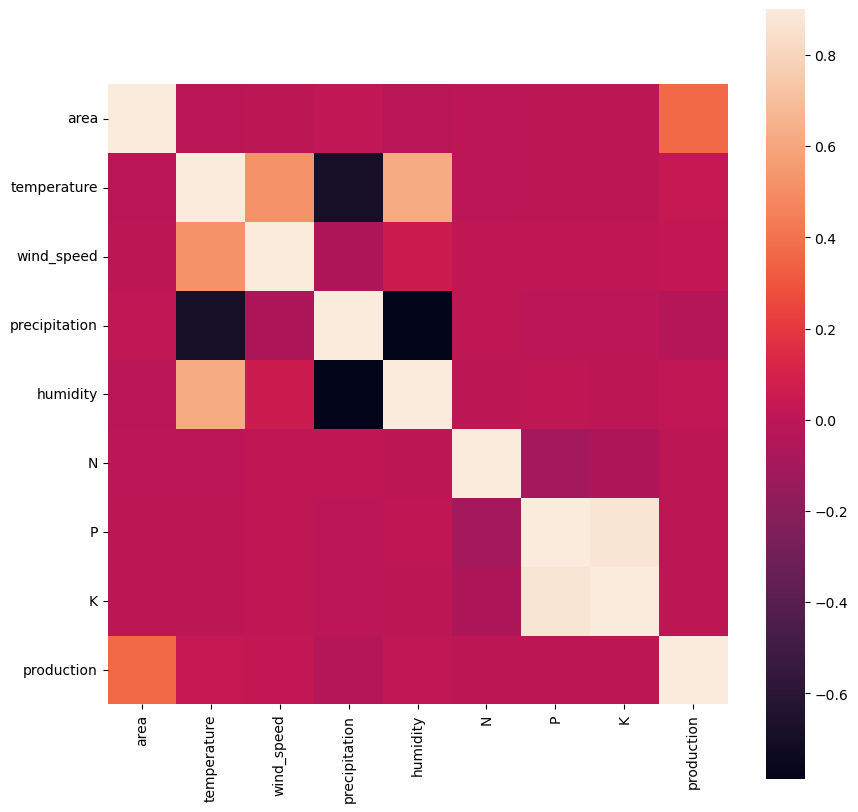

In [17]:
fig=plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), vmax=.9,square=True)
plt.show()

In [18]:
data['yield']=data['production']/data['area']

In [19]:
data=data.drop(['precipitation'],axis=1)
data.columns

Index(['state_names', 'district_names', 'crop_names', 'area', 'temperature',
       'wind_speed', 'humidity', 'N', 'P', 'K', 'production', 'yield'],
      dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25975 entries, 36 to 246086
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_names     25975 non-null  object 
 1   district_names  25975 non-null  object 
 2   crop_names      25975 non-null  object 
 3   area            25975 non-null  float64
 4   temperature     25975 non-null  float64
 5   wind_speed      25975 non-null  float64
 6   humidity        25975 non-null  float64
 7   N               25975 non-null  float64
 8   P               25975 non-null  float64
 9   K               25975 non-null  float64
 10  production      25975 non-null  float64
 11  yield           25975 non-null  float64
dtypes: float64(9), object(3)
memory usage: 2.6+ MB


# Indipendent and Dependent variables

In [21]:
X=data.iloc[:,0:10]
Y=data.iloc[:,11]

In [22]:
Y

36         1.370797
38         6.084312
45         5.770335
47        26.454545
54         4.929293
            ...    
246057     0.392857
246058     2.731061
246080    20.953878
246085     6.273846
246086     2.617647
Name: yield, Length: 25975, dtype: float64

In [23]:
X

,state_names,district_names,crop_names,area,temperature,wind_speed,humidity,N,P,K
36,Andaman and Nicobar Islands,NICOBARS,Rice,52.94,20.48349,1.971802,64.876363,2.535,2.535,2.535
38,Andaman and Nicobar Islands,NICOBARS,Banana,66.42,20.48349,1.971802,64.876363,0.000,25.136,0.000
45,Andaman and Nicobar Islands,NICOBARS,Rice,2.09,20.48349,1.971802,64.876363,1.500,0.000,0.000
47,Andaman and Nicobar Islands,NICOBARS,Banana,22.00,20.48349,1.971802,64.876363,0.000,0.000,0.000
54,Andaman and Nicobar Islands,NICOBARS,Banana,198.00,20.48349,1.971802,64.876363,0.000,14.128,0.000
...,...,...,...,...,...,...,...,...,...,...
246057,West Bengal,PURULIA,Ragi,112.00,20.48349,1.971802,64.876363,2.535,2.535,2.535
246058,West Bengal,PURULIA,Rice,264.00,20.48349,1.971802,64.876363,38.250,38.250,38.250
246080,West Bengal,PURULIA,Potato,477.00,20.48349,1.971802,64.876363,0.000,0.000,0.000
246085,West Bengal,PURULIA,Maize,325.00,20.48349,1.971802,64.876363,916.136,0.000,0.000


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25975 entries, 36 to 246086
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_names     25975 non-null  object 
 1   district_names  25975 non-null  object 
 2   crop_names      25975 non-null  object 
 3   area            25975 non-null  float64
 4   temperature     25975 non-null  float64
 5   wind_speed      25975 non-null  float64
 6   humidity        25975 non-null  float64
 7   N               25975 non-null  float64
 8   P               25975 non-null  float64
 9   K               25975 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.2+ MB


## dummpy encoding classfication features

In [25]:
X=X.join(pd.get_dummies(X['district_names']))
X=X.join(pd.get_dummies(X['crop_names']))
X=X.join(pd.get_dummies(X['state_names']))
X.shape

(25975, 687)

In [26]:
X.drop(['district_names','crop_names','state_names'],axis=1)

,area,temperature,wind_speed,humidity,N,P,K,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
36,52.94,20.48349,1.971802,64.876363,2.535,2.535,2.535,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,66.42,20.48349,1.971802,64.876363,0.000,25.136,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,2.09,20.48349,1.971802,64.876363,1.500,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,22.00,20.48349,1.971802,64.876363,0.000,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,198.00,20.48349,1.971802,64.876363,0.000,14.128,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246057,112.00,20.48349,1.971802,64.876363,2.535,2.535,2.535,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246058,264.00,20.48349,1.971802,64.876363,38.250,38.250,38.250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246080,477.00,20.48349,1.971802,64.876363,0.000,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246085,325.00,20.48349,1.971802,64.876363,916.136,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
X=X.drop(['district_names','crop_names','state_names',],axis=1)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25975 entries, 36 to 246086
Columns: 684 entries, area to West Bengal
dtypes: float64(7), uint8(677)
memory usage: 19.4 MB


In [29]:
X.columns

Index(['area', 'temperature', 'wind_speed', 'humidity', 'N', 'P', 'K',
       '24 PARAGANAS NORTH', '24 PARAGANAS SOUTH', 'ADILABAD',
       ...
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana ', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', length=684)

In [30]:
feature_listxyz=[0]*len(X.columns)

In [31]:
feature_list=[]
for i in X.columns:
    feature_list.append(i)

In [32]:
feature_list

['area',
 'temperature',
 'wind_speed',
 'humidity',
 'N',
 'P',
 'K',
 '24 PARAGANAS NORTH',
 '24 PARAGANAS SOUTH',
 'ADILABAD',
 'AGAR MALWA',
 'AGRA',
 'AHMADABAD',
 'AHMEDNAGAR',
 'AIZAWL',
 'AJMER',
 'AKOLA',
 'ALAPPUZHA',
 'ALIGARH',
 'ALIRAJPUR',
 'ALLAHABAD',
 'ALMORA',
 'ALWAR',
 'AMBALA',
 'AMBEDKAR NAGAR',
 'AMETHI',
 'AMRAVATI',
 'AMRELI',
 'AMRITSAR',
 'AMROHA',
 'ANAND',
 'ANANTAPUR',
 'ANANTNAG',
 'ANJAW',
 'ANUGUL',
 'ANUPPUR',
 'ARARIA',
 'ARIYALUR',
 'ARWAL',
 'ASHOKNAGAR',
 'AURAIYA',
 'AURANGABAD',
 'AZAMGARH',
 'BADGAM',
 'BAGALKOT',
 'BAGESHWAR',
 'BAGHPAT',
 'BAHRAICH',
 'BALAGHAT',
 'BALANGIR',
 'BALESHWAR',
 'BALLIA',
 'BALOD',
 'BALODA BAZAR',
 'BALRAMPUR',
 'BANAS KANTHA',
 'BANDA',
 'BANDIPORA',
 'BANGALORE RURAL',
 'BANKA',
 'BANKURA',
 'BANSWARA',
 'BARABANKI',
 'BARAMULLA',
 'BARAN',
 'BARDHAMAN',
 'BAREILLY',
 'BARGARH',
 'BARMER',
 'BARNALA',
 'BARPETA',
 'BARWANI',
 'BASTAR',
 'BASTI',
 'BATHINDA',
 'BEED',
 'BEGUSARAI',
 'BELGAUM',
 'BELLARY',
 'BEMET

## Test and Train split dataset

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=39)

In [34]:
X_train

,area,temperature,wind_speed,humidity,N,P,K,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
215662,821.0,20.48349,1.971802,64.876363,8.220,8.220,0.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
103879,33857.0,20.48349,1.971802,64.876363,39.720,105.920,52.960,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91422,568.0,20.48349,1.971802,64.876363,41.700,111.200,55.600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229059,204.0,20.48349,1.971802,64.876363,10.500,27.300,27.300,0,0,0,...,0,0,0,0,0,0,0,1,0,0
123601,14485.0,20.48349,1.971802,64.876363,8.460,8.460,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91632,70.0,20.48349,1.971802,64.876363,0.000,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
222464,2.0,20.48349,1.971802,64.876363,3.840,4.800,0.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10598,16770.0,20.48349,1.971802,64.876363,59.220,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65900,801.0,20.48349,1.971802,64.876363,3.255,3.255,3.255,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
Y_train

215662    14.524970
103879     0.969489
91422     10.253521
229059    13.455882
123601     0.394960
            ...    
91632      7.857143
222464     2.000000
10598      1.612642
65900      3.745318
232475     7.000000
Name: yield, Length: 18182, dtype: float64

In [36]:
X_test

,area,temperature,wind_speed,humidity,N,P,K,24 PARAGANAS NORTH,24 PARAGANAS SOUTH,ADILABAD,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
139412,1755.0,20.48349,1.971802,64.876363,928.372,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64706,200.0,20.48349,1.971802,64.876363,7.660,7.660,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224227,33.0,20.48349,1.971802,64.876363,7.476,7.476,0.000,0,0,0,...,0,0,0,0,0,0,0,1,0,0
131256,3200.0,20.48349,1.971802,64.876363,0.000,3.104,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103926,977.0,20.48349,1.971802,64.876363,5.300,13.780,13.780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107318,1769.0,18.03000,0.270000,45.000000,0.152,0.152,0.152,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123324,460.0,20.48349,1.971802,64.876363,2.800,3.500,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148879,43.0,20.48349,1.971802,64.876363,7.992,20.424,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21141,1186.0,20.48349,1.971802,64.876363,2.100,0.000,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
Y_test

139412    14.317949
64706      2.000000
224227    17.181818
131256     0.406250
103926     7.765609
            ...    
107318     1.746750
123324    74.043478
148879    10.534884
21141      2.068297
6190       1.649703
Name: yield, Length: 7793, dtype: float64

## Normalization

In [38]:
scalar=MinMaxScaler()

In [39]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [40]:
X_train

array([[1.67530646e-03, 4.27438647e-01, 5.28510080e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.90957284e-02, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15897983e-03, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.42242927e-02, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.63449013e-03, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20408188e-05, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [41]:
X_test

array([[2.81541383e-03, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.19422664e-04, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.13644484e-05, 4.27438647e-01, 5.28510080e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.74158385e-05, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90208973e-03, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.89085376e-03, 4.27438647e-01, 5.28510080e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Model  Fitting

In [42]:
ran_reg=RandomForestRegressor(n_estimators=50,random_state=2)

In [43]:
ran_reg.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50, random_state=2)

In [44]:
res=ran_reg.predict(X_test)

In [45]:
print(mean_squared_error(res,Y_test))
print(mean_absolute_error(res,Y_test))
print(r2_score(res,Y_test))

12.490928664219867
1.4234655504543994
0.8197182215833572


# Analysis

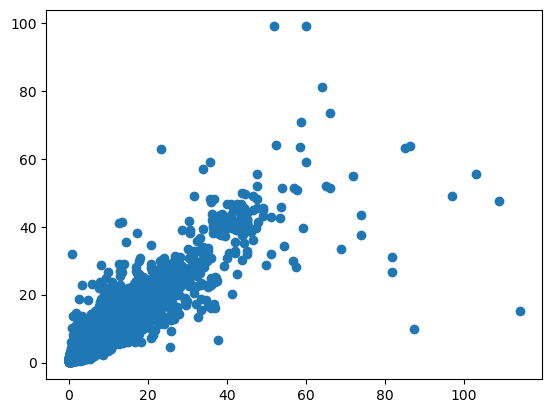

In [46]:
plt.scatter(x=Y_test,y=res)
plt.show()

In [47]:
residuals=Y_test-res
residuals

139412     1.739945
64706      0.388444
224227     0.639599
131256    -0.217413
103926    -0.518003
            ...    
107318    -0.069047
123324    30.490956
148879    -1.866795
21141     -0.269676
6190       0.244836
Name: yield, Length: 7793, dtype: float64

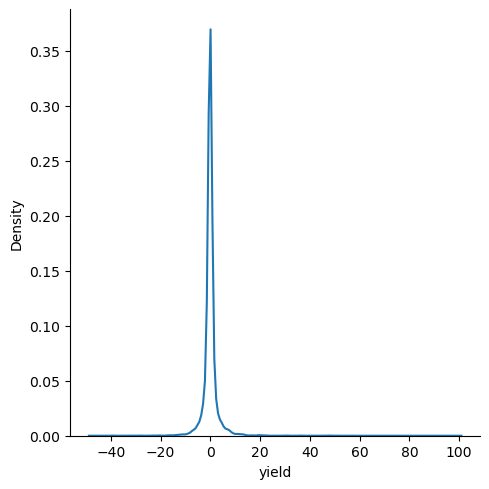

In [48]:
sns.displot(residuals,kind="kde")
plt.show()

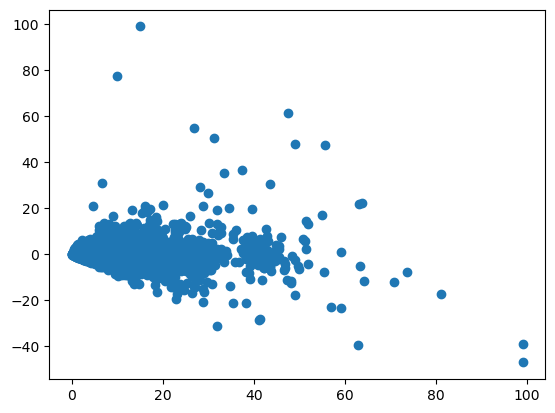

In [49]:
plt.scatter(res,residuals)
plt.show()

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25975 entries, 36 to 246086
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state_names     25975 non-null  object 
 1   district_names  25975 non-null  object 
 2   crop_names      25975 non-null  object 
 3   area            25975 non-null  float64
 4   temperature     25975 non-null  float64
 5   wind_speed      25975 non-null  float64
 6   humidity        25975 non-null  float64
 7   N               25975 non-null  float64
 8   P               25975 non-null  float64
 9   K               25975 non-null  float64
 10  production      25975 non-null  float64
 11  yield           25975 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.6+ MB


# New Data Prediction

In [51]:
n=data.iloc[15000,:10]
data.iloc[15000,:]

state_names                Meghalaya
district_names    EAST JAINTIA HILLS
crop_names                    Banana
area                           350.0
temperature                 20.48349
wind_speed                  1.971802
humidity                   64.876363
N                             32.508
P                             83.076
K                                0.0
production                    1127.0
yield                           3.22
Name: 139811, dtype: object

In [52]:
n

state_names                Meghalaya
district_names    EAST JAINTIA HILLS
crop_names                    Banana
area                           350.0
temperature                 20.48349
wind_speed                  1.971802
humidity                   64.876363
N                             32.508
P                             83.076
K                                0.0
Name: 139811, dtype: object

In [53]:
def new(n):
    feature_list=['area',
 'temperature',
 'wind_speed',
 'humidity',
 'N',
 'P',
 'K',
 '24 PARAGANAS NORTH',
 '24 PARAGANAS SOUTH',
 'ADILABAD',
 'AGAR MALWA',
 'AGRA',
 'AHMADABAD',
 'AHMEDNAGAR',
 'AIZAWL',
 'AJMER',
 'AKOLA',
 'ALAPPUZHA',
 'ALIGARH',
 'ALIRAJPUR',
 'ALLAHABAD',
 'ALMORA',
 'ALWAR',
 'AMBALA',
 'AMBEDKAR NAGAR',
 'AMETHI',
 'AMRAVATI',
 'AMRELI',
 'AMRITSAR',
 'AMROHA',
 'ANAND',
 'ANANTAPUR',
 'ANANTNAG',
 'ANJAW',
 'ANUGUL',
 'ANUPPUR',
 'ARARIA',
 'ARIYALUR',
 'ARWAL',
 'ASHOKNAGAR',
 'AURAIYA',
 'AURANGABAD',
 'AZAMGARH',
 'BADGAM',
 'BAGALKOT',
 'BAGESHWAR',
 'BAGHPAT',
 'BAHRAICH',
 'BALAGHAT',
 'BALANGIR',
 'BALESHWAR',
 'BALLIA',
 'BALOD',
 'BALODA BAZAR',
 'BALRAMPUR',
 'BANAS KANTHA',
 'BANDA',
 'BANDIPORA',
 'BANGALORE RURAL',
 'BANKA',
 'BANKURA',
 'BANSWARA',
 'BARABANKI',
 'BARAMULLA',
 'BARAN',
 'BARDHAMAN',
 'BAREILLY',
 'BARGARH',
 'BARMER',
 'BARNALA',
 'BARPETA',
 'BARWANI',
 'BASTAR',
 'BASTI',
 'BATHINDA',
 'BEED',
 'BEGUSARAI',
 'BELGAUM',
 'BELLARY',
 'BEMETARA',
 'BENGALURU URBAN',
 'BETUL',
 'BHADRAK',
 'BHAGALPUR',
 'BHANDARA',
 'BHARATPUR',
 'BHARUCH',
 'BHAVNAGAR',
 'BHILWARA',
 'BHIND',
 'BHIWANI',
 'BHOJPUR',
 'BHOPAL',
 'BIDAR',
 'BIJAPUR',
 'BIJNOR',
 'BIKANER',
 'BILASPUR',
 'BIRBHUM',
 'BISHNUPUR',
 'BOKARO',
 'BONGAIGAON',
 'BOUDH',
 'BUDAUN',
 'BULANDSHAHR',
 'BULDHANA',
 'BUNDI',
 'BURHANPUR',
 'BUXAR',
 'CACHAR',
 'CHAMARAJANAGAR',
 'CHAMBA',
 'CHAMOLI',
 'CHAMPAWAT',
 'CHAMPHAI',
 'CHANDAULI',
 'CHANDEL',
 'CHANDIGARH',
 'CHANDRAPUR',
 'CHANGLANG',
 'CHATRA',
 'CHHATARPUR',
 'CHHINDWARA',
 'CHIKBALLAPUR',
 'CHIKMAGALUR',
 'CHIRANG',
 'CHITRADURGA',
 'CHITRAKOOT',
 'CHITTOOR',
 'CHITTORGARH',
 'CHURACHANDPUR',
 'CHURU',
 'COIMBATORE',
 'COOCHBEHAR',
 'CUDDALORE',
 'CUTTACK',
 'DADRA AND NAGAR HAVELI',
 'DAKSHIN KANNAD',
 'DAMOH',
 'DANG',
 'DANTEWADA',
 'DARBHANGA',
 'DARJEELING',
 'DARRANG',
 'DATIA',
 'DAUSA',
 'DAVANGERE',
 'DEHRADUN',
 'DEOGARH',
 'DEOGHAR',
 'DEORIA',
 'DEWAS',
 'DHALAI',
 'DHAMTARI',
 'DHANBAD',
 'DHAR',
 'DHARMAPURI',
 'DHARWAD',
 'DHEMAJI',
 'DHENKANAL',
 'DHOLPUR',
 'DHUBRI',
 'DHULE',
 'DIBANG VALLEY',
 'DIBRUGARH',
 'DIMA HASAO',
 'DIMAPUR',
 'DINAJPUR DAKSHIN',
 'DINAJPUR UTTAR',
 'DINDIGUL',
 'DINDORI',
 'DODA',
 'DOHAD',
 'DUMKA',
 'DUNGARPUR',
 'DURG',
 'EAST DISTRICT',
 'EAST GARO HILLS',
 'EAST GODAVARI',
 'EAST JAINTIA HILLS',
 'EAST KAMENG',
 'EAST KHASI HILLS',
 'EAST SIANG',
 'EAST SINGHBUM',
 'ERNAKULAM',
 'ERODE',
 'ETAH',
 'ETAWAH',
 'FAIZABAD',
 'FARIDABAD',
 'FARRUKHABAD',
 'FATEHABAD',
 'FATEHGARH SAHIB',
 'FATEHPUR',
 'FIROZABAD',
 'FIROZEPUR',
 'GADAG',
 'GADCHIROLI',
 'GAJAPATI',
 'GANDERBAL',
 'GANDHINAGAR',
 'GANGANAGAR',
 'GANJAM',
 'GARHWA',
 'GARIYABAND',
 'GAUTAM BUDDHA NAGAR',
 'GAYA',
 'GHAZIABAD',
 'GHAZIPUR',
 'GIRIDIH',
 'GOALPARA',
 'GODDA',
 'GOLAGHAT',
 'GOMATI',
 'GONDA',
 'GONDIA',
 'GOPALGANJ',
 'GORAKHPUR',
 'GULBARGA',
 'GUMLA',
 'GUNA',
 'GUNTUR',
 'GURDASPUR',
 'GURGAON',
 'GWALIOR',
 'HAILAKANDI',
 'HAMIRPUR',
 'HANUMANGARH',
 'HAPUR',
 'HARDA',
 'HARDOI',
 'HARIDWAR',
 'HASSAN',
 'HATHRAS',
 'HAVERI',
 'HAZARIBAGH',
 'HINGOLI',
 'HISAR',
 'HOOGHLY',
 'HOSHANGABAD',
 'HOWRAH',
 'IDUKKI',
 'IMPHAL EAST',
 'IMPHAL WEST',
 'INDORE',
 'JABALPUR',
 'JAGATSINGHAPUR',
 'JAIPUR',
 'JAISALMER',
 'JAJAPUR',
 'JALANDHAR',
 'JALAUN',
 'JALGAON',
 'JALNA',
 'JALORE',
 'JALPAIGURI',
 'JAMMU',
 'JAMNAGAR',
 'JAMTARA',
 'JAMUI',
 'JANJGIR-CHAMPA',
 'JASHPUR',
 'JAUNPUR',
 'JEHANABAD',
 'JHABUA',
 'JHAJJAR',
 'JHALAWAR',
 'JHANSI',
 'JHARSUGUDA',
 'JHUNJHUNU',
 'JIND',
 'JODHPUR',
 'JORHAT',
 'JUNAGADH',
 'KABIRDHAM',
 'KACHCHH',
 'KADAPA',
 'KAIMUR (BHABUA)',
 'KAITHAL',
 'KALAHANDI',
 'KAMRUP',
 'KAMRUP METRO',
 'KANCHIPURAM',
 'KANDHAMAL',
 'KANGRA',
 'KANKER',
 'KANNAUJ',
 'KANNIYAKUMARI',
 'KANNUR',
 'KANPUR DEHAT',
 'KANPUR NAGAR',
 'KAPURTHALA',
 'KARAIKAL',
 'KARAULI',
 'KARBI ANGLONG',
 'KARGIL',
 'KARIMGANJ',
 'KARIMNAGAR',
 'KARNAL',
 'KARUR',
 'KASARAGOD',
 'KASGANJ',
 'KATHUA',
 'KATIHAR',
 'KATNI',
 'KAUSHAMBI',
 'KENDRAPARA',
 'KENDUJHAR',
 'KHAGARIA',
 'KHAMMAM',
 'KHANDWA',
 'KHARGONE',
 'KHEDA',
 'KHERI',
 'KHORDHA',
 'KHOWAI',
 'KHUNTI',
 'KINNAUR',
 'KIPHIRE',
 'KISHANGANJ',
 'KISHTWAR',
 'KODAGU',
 'KODERMA',
 'KOHIMA',
 'KOKRAJHAR',
 'KOLAR',
 'KOLASIB',
 'KOLHAPUR',
 'KOLLAM',
 'KONDAGAON',
 'KOPPAL',
 'KORAPUT',
 'KORBA',
 'KOREA',
 'KOTA',
 'KOTTAYAM',
 'KOZHIKODE',
 'KRISHNA',
 'KRISHNAGIRI',
 'KULGAM',
 'KULLU',
 'KUPWARA',
 'KURNOOL',
 'KURUKSHETRA',
 'KURUNG KUMEY',
 'KUSHI NAGAR',
 'LAHUL AND SPITI',
 'LAKHIMPUR',
 'LAKHISARAI',
 'LALITPUR',
 'LATEHAR',
 'LATUR',
 'LAWNGTLAI',
 'LEH LADAKH',
 'LOHARDAGA',
 'LOHIT',
 'LONGDING',
 'LONGLENG',
 'LOWER DIBANG VALLEY',
 'LOWER SUBANSIRI',
 'LUCKNOW',
 'LUDHIANA',
 'LUNGLEI',
 'MADHEPURA',
 'MADHUBANI',
 'MADURAI',
 'MAHARAJGANJ',
 'MAHASAMUND',
 'MAHBUBNAGAR',
 'MAHE',
 'MAHENDRAGARH',
 'MAHESANA',
 'MAHOBA',
 'MAINPURI',
 'MALAPPURAM',
 'MALDAH',
 'MALKANGIRI',
 'MAMIT',
 'MANDI',
 'MANDLA',
 'MANDSAUR',
 'MANDYA',
 'MARIGAON',
 'MATHURA',
 'MAU',
 'MAYURBHANJ',
 'MEDAK',
 'MEDINIPUR EAST',
 'MEDINIPUR WEST',
 'MEERUT',
 'MEWAT',
 'MIRZAPUR',
 'MOGA',
 'MOKOKCHUNG',
 'MON',
 'MORADABAD',
 'MORENA',
 'MUNGELI',
 'MUNGER',
 'MURSHIDABAD',
 'MUZAFFARNAGAR',
 'MUZAFFARPUR',
 'MYSORE',
 'NABARANGPUR',
 'NADIA',
 'NAGAON',
 'NAGAPATTINAM',
 'NAGAUR',
 'NAGPUR',
 'NAINITAL',
 'NALANDA',
 'NALBARI',
 'NALGONDA',
 'NAMAKKAL',
 'NAMSAI',
 'NANDED',
 'NANDURBAR',
 'NARAYANPUR',
 'NARMADA',
 'NARSINGHPUR',
 'NASHIK',
 'NAVSARI',
 'NAWADA',
 'NAYAGARH',
 'NEEMUCH',
 'NICOBARS',
 'NIZAMABAD',
 'NORTH AND MIDDLE ANDAMAN',
 'NORTH DISTRICT',
 'NORTH GARO HILLS',
 'NORTH GOA',
 'NORTH TRIPURA',
 'NUAPADA',
 'OSMANABAD',
 'PAKUR',
 'PALAKKAD',
 'PALAMU',
 'PALGHAR',
 'PALI',
 'PALWAL',
 'PANCH MAHALS',
 'PANCHKULA',
 'PANIPAT',
 'PANNA',
 'PAPUM PARE',
 'PARBHANI',
 'PASHCHIM CHAMPARAN',
 'PATAN',
 'PATHANAMTHITTA',
 'PATHANKOT',
 'PATIALA',
 'PATNA',
 'PAURI GARHWAL',
 'PERAMBALUR',
 'PEREN',
 'PHEK',
 'PILIBHIT',
 'PITHORAGARH',
 'PONDICHERRY',
 'POONCH',
 'PORBANDAR',
 'PRAKASAM',
 'PRATAPGARH',
 'PUDUKKOTTAI',
 'PULWAMA',
 'PUNE',
 'PURBI CHAMPARAN',
 'PURI',
 'PURNIA',
 'PURULIA',
 'RAE BARELI',
 'RAICHUR',
 'RAIGAD',
 'RAIGARH',
 'RAIPUR',
 'RAISEN',
 'RAJAURI',
 'RAJGARH',
 'RAJKOT',
 'RAJNANDGAON',
 'RAJSAMAND',
 'RAMANAGARA',
 'RAMANATHAPURAM',
 'RAMBAN',
 'RAMGARH',
 'RAMPUR',
 'RANCHI',
 'RANGAREDDI',
 'RATLAM',
 'RATNAGIRI',
 'RAYAGADA',
 'REASI',
 'REWA',
 'REWARI',
 'RI BHOI',
 'ROHTAK',
 'ROHTAS',
 'RUDRA PRAYAG',
 'S.A.S NAGAR',
 'SABAR KANTHA',
 'SAGAR',
 'SAHARANPUR',
 'SAHARSA',
 'SAHEBGANJ',
 'SAIHA',
 'SALEM',
 'SAMASTIPUR',
 'SAMBA',
 'SAMBALPUR',
 'SAMBHAL',
 'SANGLI',
 'SANGRUR',
 'SANT KABEER NAGAR',
 'SANT RAVIDAS NAGAR',
 'SARAIKELA KHARSAWAN',
 'SARAN',
 'SATARA',
 'SATNA',
 'SAWAI MADHOPUR',
 'SEHORE',
 'SENAPATI',
 'SEONI',
 'SEPAHIJALA',
 'SERCHHIP',
 'SHAHDOL',
 'SHAHJAHANPUR',
 'SHAJAPUR',
 'SHAMLI',
 'SHEIKHPURA',
 'SHEOHAR',
 'SHEOPUR',
 'SHIMLA',
 'SHIMOGA',
 'SHIVPURI',
 'SHOPIAN',
 'SHRAVASTI',
 'SIDDHARTH NAGAR',
 'SIDHI',
 'SIKAR',
 'SIMDEGA',
 'SINDHUDURG',
 'SINGRAULI',
 'SIRMAUR',
 'SIROHI',
 'SIRSA',
 'SITAMARHI',
 'SITAPUR',
 'SIVAGANGA',
 'SIVASAGAR',
 'SIWAN',
 'SOLAN',
 'SOLAPUR',
 'SONBHADRA',
 'SONEPUR',
 'SONIPAT',
 'SONITPUR',
 'SOUTH ANDAMANS',
 'SOUTH DISTRICT',
 'SOUTH GARO HILLS',
 'SOUTH GOA',
 'SOUTH TRIPURA',
 'SOUTH WEST GARO HILLS',
 'SOUTH WEST KHASI HILLS',
 'SPSR NELLORE',
 'SRIKAKULAM',
 'SRINAGAR',
 'SUKMA',
 'SULTANPUR',
 'SUNDARGARH',
 'SUPAUL',
 'SURAJPUR',
 'SURAT',
 'SURENDRANAGAR',
 'SURGUJA',
 'TAMENGLONG',
 'TAPI',
 'TARN TARAN',
 'TEHRI GARHWAL',
 'THANE',
 'THANJAVUR',
 'THE NILGIRIS',
 'THENI',
 'THIRUVALLUR',
 'THIRUVANANTHAPURAM',
 'THIRUVARUR',
 'THOUBAL',
 'THRISSUR',
 'TIKAMGARH',
 'TINSUKIA',
 'TIRAP',
 'TIRUCHIRAPPALLI',
 'TIRUNELVELI',
 'TIRUPPUR',
 'TIRUVANNAMALAI',
 'TONK',
 'TUENSANG',
 'TUMKUR',
 'TUTICORIN',
 'UDAIPUR',
 'UDALGURI',
 'UDAM SINGH NAGAR',
 'UDHAMPUR',
 'UDUPI',
 'UJJAIN',
 'UKHRUL',
 'UMARIA',
 'UNA',
 'UNAKOTI',
 'UNNAO',
 'UPPER SIANG',
 'UPPER SUBANSIRI',
 'UTTAR KANNAD',
 'UTTAR KASHI',
 'VADODARA',
 'VAISHALI',
 'VALSAD',
 'VARANASI',
 'VELLORE',
 'VIDISHA',
 'VILLUPURAM',
 'VIRUDHUNAGAR',
 'VISAKHAPATANAM',
 'VIZIANAGARAM',
 'WARANGAL',
 'WARDHA',
 'WASHIM',
 'WAYANAD',
 'WEST DISTRICT',
 'WEST GARO HILLS',
 'WEST GODAVARI',
 'WEST JAINTIA HILLS',
 'WEST KAMENG',
 'WEST KHASI HILLS',
 'WEST SIANG',
 'WEST SINGHBHUM',
 'WEST TRIPURA',
 'WOKHA',
 'YADGIR',
 'YAMUNANAGAR',
 'YANAM',
 'YAVATMAL',
 'ZUNHEBOTO',
 'Banana',
 'Cotton(lint)',
 'Drum Stick',
 'Maize',
 'Onion',
 'Potato',
 'Ragi',
 'Rice',
 'Tomato',
 'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir ',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana ',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']
    new_data=[0]*len(feature_list)
#     print(new_data)
    for i in range(len(feature_list)):
        if(i<7):
            new_data[i]=n[i+3]
        else:
            for j in range(0,3):
                if(n[j]==feature_list[i]):
                    new_data[i]=1
#     print(new_data)
    new_data=np.array(new_data)
    new_data=new_data.reshape(1,-1)
    return (new_data)

In [55]:
new_data=new(n)
new_data=scalar.fit_transform(new_data)
new_pre=ran_reg.predict(new_data)
new_pre

array([2.02909882])

# Pikling the model

In [64]:
pickle.dump(ran_reg,open('regression.pkl','wb'))

In [65]:
pickle_model=pickle.load(open('regression.pkl','rb'))

In [66]:
pickle.dump(scalar,open('scalar.pkl','wb'))

In [67]:
pickle_scalar=pickle.load(open('scalar.pkl','rb'))

In [68]:
pickle.dump(new,open('newdata.pkl','wb'))
newd=pickle.load(open('newdata.pkl','rb'))

In [69]:
newdata1=newd(n)

In [70]:
newdata1=pickle_scalar.fit_transform(newdata1)

In [71]:
pickle_model.predict(newdata1)

array([2.02909882])